# 2D Coordinate transformation

## Example 2: 1DOF robot arm - Forward kinematics  

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython import display
import numpy as np
import math

PI = 3.1415926535

def plot3x3Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2]))
    print("[%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2]))
    print("[%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2]))
    
def IIDrotM(phi):
    m = np.array([[math.cos(float(phi)),math.sin(float(phi)),0],[-math.sin(float(phi)),math.cos(float(phi)),0],[0,0,1]])
    return m

def IIDtraM(v):
    m = np.array([[1,0,float(v[0])],[0,1,float(v[1])],[0,0,1]])
    return m

def IIDtraHTMvec(x,y):
    v = np.array([ [float(x)],[float(y)],[1] ])
    return v

### (I) Scenario

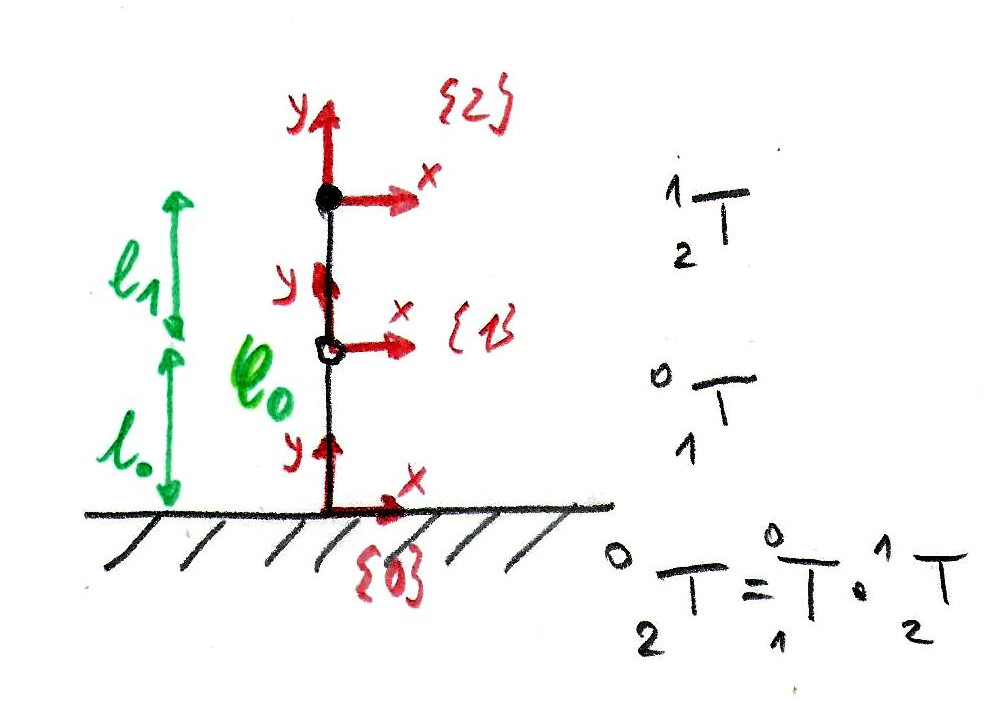

In [2]:
# definition of parameters of the kinematic chain
l0 = 1
l1 = 1
phi = 0

### (II) Derive the two HTMs  $~~~^{0}_{1}T~~~$ and  $~~~^{1}_{2}T~~~$

#### (II).a  HTM $~~~^{0}_{1}T~~~$

In [3]:
TR_1_0 = IIDtraM(IIDtraHTMvec(0,l0))
R_1_0  = IIDrotM(-phi)

T_1_0 = TR_1_0 @ R_1_0

In [4]:
#Output final matrix T_1_0
plot3x3Mat(T_1_0)

[  1.00	  0.00	  0.00]
[  0.00	  1.00	  1.00]
[  0.00	  0.00	  1.00]


#### (II).b  HTM $~~~^{1}_{2}T~~~$

In [5]:
TR_2_1 = IIDtraM(IIDtraHTMvec(0,l1))
R_2_1  = IIDrotM(0)

T_2_1 = TR_2_1 @ R_2_1

In [6]:
#Output final matrix T_2_1
plot3x3Mat(T_2_1)

[  1.00	  0.00	  0.00]
[  0.00	  1.00	  1.00]
[  0.00	  0.00	  1.00]


### (III) Define a function for the final parameterized HTM $~~~^{0}_{2}T(\phi, ...)~~~$

In [7]:
def FK(PHI, L0,L1):
    htm_1_0 = IIDtraM(IIDtraHTMvec(0,L0)) @ IIDrotM(-PHI)
    htm_2_1 = IIDtraM(IIDtraHTMvec(0,L1)) @ IIDrotM(0)
    htm_2_0 = htm_1_0 @ htm_2_1
    return htm_2_0

### (VI) Calculate position of the TCP for a given joint position $\phi$

In [8]:
phi = PI/2

In [9]:
TCP = FK(phi,l0,l1)

In [10]:
plot3x3Mat(TCP)

[  0.00	 -1.00	 -1.00]
[  1.00	  0.00	  1.00]
[  0.00	  0.00	  1.00]


In [11]:
print("x_TCP = ",end=""); print("%6.2f"%TCP[0,2])
print("y_TCP = ",end=""); print("%6.2f"%TCP[1,2])

x_TCP =  -1.00
y_TCP =   1.00


### (V) Check for plausibility

The result seems plausible because *\<PUT YOUR ANSWER HERE...\>*